# ML Project Notebook report

## 1. Understanding and plotting the data
In the first part of this exercise we will use `pandas` DataFrames to store and manipulate the data and use `seaborn` to produce nice visualizations of the data.

The point of this part is to handle the data to get to know the dataset better.

The Data ProQDock.csv is taken from the following piece of literature: https://academic.oup.com/bioinformatics/article/32/12/i262/2288786

The data attributes are used to find correct protein-portein models and are listed as follows within the above mentionned paper in the Training features section:
- rGb: Residue Given burial. Relative solvant accessibility of the protein amino acids. Values range around 0.059 (+- 0.022)
- nBSA: Normalized buried surface area. It measures the fraction of exposed surface area buried upon association
- Fintres: Fraction of residues buried at the interface
- Sc: Shape Complementarity at the interface
- Ec: Electrostatic Complementarity at the interface
- ProQ: Protein quality predictor score
- Isc: Rosetta energy at the interface
- rTs: Roseta total energy
- Erep: Rosetta repulsive term
- Etmr: Rosetta total ernergy minus repulsive
- CPM: Joint Conditional Probability of Sc, EC given nBSA. CPM is the joint conditional probability of finding its interface within a certain range of Sc and EC given its size (nBSA)
- Ld: Link Density at the interface
- CPscore: Contact Preference score

As presented in the paper, the target function or benchmark is also part of our dataset and lists the following properties:
- DockQ: Score of quality for a protein-protein docking model
- DockQ-binary: Applied threshold on the DockQ score reflecting no similarity or perfect similarity scores
- ProQDock: Predicted DockQ protein docking quality score
- zrank and zrank2: All atom energy terms. Non bonded energy terms based (Coulomb, Van der Waals, desolvation)
- ProQDockZ: External energy term. Hybrid method combining ProQDock and Zrank.

Finally here, 'cv' represents the cross validation batched used initally in our dataset.






In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

train=pd.read_csv('ProQDock.csv')
train

,Model,rGb,nBSA,Fintres,Sc,EC,ProQ,zrank,zrank2,Isc,...,Erep,Etmr,CPM,Ld,CPscore,DockQ,DockQ-Binary,ProQDock,ProQDockZ,cv
0,T50-1,0.035,0.034,0.106,0.571,0.072,0.682,0.611,0.657,1.000,...,0.998,0.400,0.723,0.114,0.135,0.01262,0,0.296446,0.296439,5
1,T50-2,0.033,0.036,0.124,0.579,-0.128,0.703,0.633,0.671,1.000,...,0.998,0.487,0.695,0.088,0.112,0.01464,0,0.234311,0.220123,5
2,T50-3,0.042,0.027,0.088,0.776,0.434,0.698,0.536,0.452,0.464,...,0.611,0.345,0.857,0.146,0.167,0.01067,0,0.152381,0.225628,5
3,T50-4,0.032,0.032,0.118,0.514,0.458,0.640,0.579,0.534,0.490,...,0.406,0.911,0.735,0.101,0.133,0.01302,0,0.126823,0.134728,5
4,T50-5,0.040,0.029,0.102,0.336,0.172,0.708,0.589,0.839,1.000,...,1.000,0.419,0.451,0.097,0.113,0.01199,0,0.295767,0.301145,5
5,T50-6,0.046,0.030,0.104,0.375,-0.084,0.710,0.612,0.711,1.000,...,1.000,0.417,0.372,0.112,0.266,0.30721,1,0.237555,0.277879,5
6,T50-7,0.043,0.027,0.090,0.602,0.429,0.746,0.633,0.584,0.784,...,0.647,0.381,0.799,0.122,0.123,0.37010,1,0.131572,0.125022,5
7,T50-8,0.041,0.014,0.058,0.575,0.051,0.715,0.622,0.682,1.000,...,1.000,0.421,0.723,0.165,0.116,0.01421,0,0.253425,0.278002,5
8,T50-9,0.041,0.037,0.106,0.377,-0.287,0.683,0.687,0.997,1.000,...,1.000,0.491,0.289,0.098,0.142,0.00777,0,0.183456,0.125676,5
9,T50-10,0.045,0.020,0.082,0.552,0.065,0.714,0.639,0.655,0.527,...,0.982,0.414,0.723,0.134,0.302,0.07302,0,0.378346,0.405764,5


Now, we can plot some of the columns containing continuous values to visualize the distributions.

rTs mean: 0.5602546178969766
tail rTs mean: 0.4060517957694497
DockQ mean: 0.05342665370177128
DockQ std: 0.13084898615761434
ProQDock mean: 0.1529110643090434
ProQDock std: 0.16285711061293873


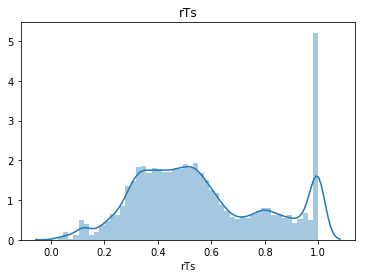

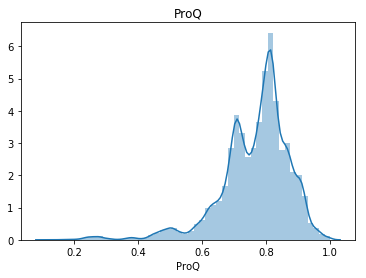

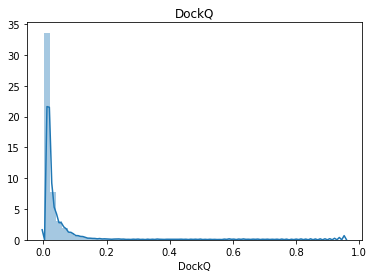

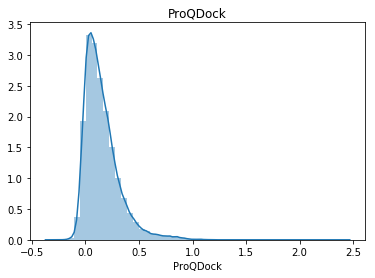

In [2]:
plt.clf()
sns.distplot(train['rTs'])
import numpy as np
estimated_rows=(train['rTs']>0.6) & (train['rTs']<=1.0)
print("rTs mean: " + str(np.mean(train['rTs'])))
print("tail rTs mean: " + str(np.mean(train[~estimated_rows]['rTs'])))
print("DockQ mean: " + str(np.mean(train['DockQ'])))
print("DockQ std: " + str(np.std(train['DockQ'])))
print("ProQDock mean: " + str(np.mean(train['ProQDock'])))
print("ProQDock std: " + str(np.std(train['ProQDock'])))
plt.title('rTs')
plt.show()

sns.distplot(train['ProQ'].dropna())
plt.title('ProQ')
plt.show()

sns.distplot(train['DockQ'].dropna())
plt.title('DockQ')
plt.show()

sns.distplot(train['ProQDock'].dropna())
plt.title('ProQDock')
plt.show()

It is then possible to sort the data to find the proteins with the best arelative solvent accessibility residues using rGb attribute, or the best predicted ProQDock score using ProQDock atrtibute. Finally we can select the categorical DockQ-Binary score and sort in ascending mode to get the minimun value for the binary threshold.

In [3]:
train.sort_values('rGb',ascending=False)[:10]
train.sort_values('ProQDock',ascending=False)[:10]
train.loc[(train['DockQ-Binary'] == 1)].sort_values('DockQ',ascending=True)[:10]

,Model,rGb,nBSA,Fintres,Sc,EC,ProQ,zrank,zrank2,Isc,...,Erep,Etmr,CPM,Ld,CPscore,DockQ,DockQ-Binary,ProQDock,ProQDockZ,cv
30928,D2OOB-a88d,0.048,0.062,0.366,0.778,-0.139,0.580,0.362,0.283,0.879,...,0.445,0.784,0.703,0.173,0.172,0.14680,1,0.043639,0.026873,4
30546,D2OOB-a103a,0.056,0.060,0.380,0.539,0.005,0.604,0.406,0.369,0.873,...,0.456,0.640,0.434,0.199,0.158,0.14853,1,0.089383,0.073719,4
65988,D1I9R-a91a,0.022,0.030,0.151,0.642,0.158,0.820,0.596,0.635,0.260,...,0.525,0.606,0.739,0.247,0.454,0.15287,1,0.235521,0.029917,1
48273,D1MQ8-a22a,0.003,0.041,0.227,0.682,0.453,0.904,0.469,0.559,0.300,...,0.624,0.431,0.891,0.150,0.092,0.16009,1,0.316509,0.186603,3
70821,D2FD6-a124a,0.002,0.031,0.147,0.569,0.354,0.789,0.572,0.518,0.448,...,0.480,0.806,0.830,0.105,0.312,0.16929,1,0.176880,0.191021,1
1550,T29-105,0.067,0.025,0.066,0.480,0.249,0.729,0.518,0.972,1.000,...,0.982,0.803,0.623,0.164,0.211,0.17024,1,0.299507,0.295945,5
2766,T29-1379,0.066,0.031,0.095,0.368,0.046,0.743,0.599,0.999,1.000,...,1.000,0.810,0.342,0.113,0.194,0.17922,1,0.238323,0.251161,5
3453,T29-2099,0.065,0.037,0.102,0.366,-0.090,0.747,0.613,1.000,1.000,...,1.000,0.793,0.372,0.108,0.158,0.18176,1,0.215882,0.222480,5
14031,T41-550,0.083,0.066,0.205,0.554,0.294,0.701,0.279,0.199,1.000,...,0.997,0.786,0.679,0.173,0.105,0.18494,1,0.449018,0.509401,2
10130,T35-418,0.031,0.038,0.112,0.242,-0.122,0.752,0.743,1.000,1.000,...,1.000,0.834,0.280,0.097,0.336,0.19165,1,0.165932,0.197096,3


As an additional visualization and after the continuous values, we will focus on the categorical value in our dataset.

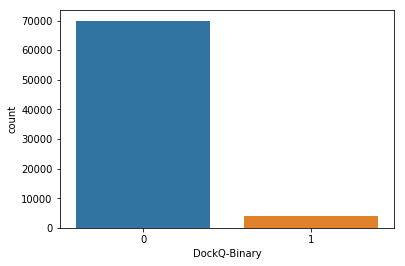

In [4]:
plt.clf()
sns.countplot(x="DockQ-Binary", data=train);
plt.show()


It is also possible to add a categorical column based on the binary score of dockQ for the protein-protein interaction.

In [5]:
import numpy as np
v = train["DockQ"].values
cats = np.array(['low', 'medium', 'high'])
min_cat = np.min(train.loc[(train['DockQ-Binary'] == 1)]['DockQ']) + np.std(train['DockQ'])
max_cat = np.max(train.loc[(train['DockQ-Binary'] == 1)]['DockQ']) - np.std(train['DockQ'])
code = np.searchsorted([min_cat, max_cat], v.ravel()).reshape(v.shape)
train['DockQ_cat'] = cats[code]
train.loc[(train['DockQ_cat'] == 'high')]

,Model,rGb,nBSA,Fintres,Sc,EC,ProQ,zrank,zrank2,Isc,...,Etmr,CPM,Ld,CPscore,DockQ,DockQ-Binary,ProQDock,ProQDockZ,cv,DockQ_cat
8552,T37-305,0.057,0.049,0.148,0.736,0.606,0.821,0.370,0.189,0.114,...,0.279,0.808,0.120,0.116,0.88594,1,0.526796,0.657898,3,high
9042,T37-853,0.051,0.050,0.148,0.664,0.634,0.828,0.332,0.139,1.000,...,0.294,0.871,0.118,0.114,0.85984,1,0.477635,0.540149,3,high
10297,T40-23,0.008,0.059,0.300,0.714,0.532,0.838,0.410,0.181,0.975,...,0.587,0.936,0.098,0.270,0.85265,1,0.856672,0.955222,2,high
10322,T40-48,0.012,0.056,0.296,0.632,0.364,0.833,0.467,0.523,1.000,...,0.397,0.808,0.100,0.278,0.94302,1,0.591641,0.486958,2,high
10324,T40-50,-0.001,0.043,0.251,0.750,0.757,0.806,0.422,0.349,0.241,...,0.566,0.625,0.107,0.226,0.87896,1,1.127876,1.212128,2,high
10330,T40-56,0.012,0.056,0.278,0.697,0.527,0.848,0.428,0.212,0.037,...,0.610,0.883,0.104,0.252,0.87395,1,0.695914,0.881600,2,high
10332,T40-58,-0.000,0.049,0.274,0.455,0.630,0.808,0.483,0.679,1.000,...,0.432,0.590,0.116,0.275,0.87155,1,0.920103,0.816118,2,high
10334,T40-60,0.006,0.059,0.296,0.686,0.546,0.847,0.427,0.200,0.182,...,0.553,0.883,0.090,0.246,0.89261,1,0.760959,0.983717,2,high
10337,T40-63,-0.003,0.043,0.256,0.764,0.449,0.823,0.417,0.323,0.365,...,0.550,0.857,0.117,0.220,0.90020,1,0.551306,0.657814,2,high
10358,T40-84,0.005,0.055,0.296,0.754,0.509,0.852,0.427,0.224,0.246,...,0.453,0.928,0.101,0.299,0.92329,1,0.560133,0.584260,2,high


In [ ]:
plt.clf()
sns.countplot(x="ProQ", hue='DockQ_cat', data=train);
plt.show()

It is possible as well to visualize the link between certain attributes and the DockQ score classes (either binary or the added categorical column)

In [ ]:
plt.clf()
sns.boxplot(x="DockQ_cat", y="rTs", data=train)
plt.show()